# used-car-quality-detection

![tristatebuyherepayhere.com/](https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/3TXIF2ALCNABNOUCDNXCJ4JTWU.jpg&w=1440)


## Table of contents:
* Problem statement and data overview
* Downloading the data
* Importing packages
* Basic exploration/EDA
* Preprocessing and Feature Engineering
* Training a Random Forest
* Gradient Boosting



## Problem Statement




One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

>### Field Name
>* RefID: Unique (sequential) number assigned to vehicles
* IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase
* PurchDate:	The Date the vehicle was Purchased at Auction
* Auction:	Auction provider at which the  vehicle was purchased
* VehYear:	The manufacturer's year of the vehicle
* VehicleAge:	The Years elapsed since the manufacturer's year
* Make:	Vehicle Manufacturer
* Model:	Vehicle Model
* Trim:	Vehicle Trim Level
* SubModel:	Vehicle Submodel
* Color:	Vehicle Color
* Transmission:	Vehicles transmission type (Automatic, Manual)
* WheelTypeID:	The type id of the vehicle wheel
* WheelType:	The vehicle wheel type description (Alloy, Covers)
* VehOdo:	The vehicles odometer reading
* Nationality:	The Manufacturer's country
* Size:	The size category of the vehicle (Compact, SUV, etc.)
* TopThreeAmericanName:	Identifies if the manufacturer is one of the top three American manufacturers
* MMRAcquisitionAuctionAveragePrice:	Acquisition price for this vehicle in average condition at time of purchase
* MMRAcquisitionAuctionCleanPrice:	Acquisition price for this vehicle in the above Average condition at time of purchase
* MMRAcquisitionRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition at time of purchase
* MMRAcquisitonRetailCleanPrice:	Acquisition price for this vehicle in the retail market in above average condition at time of purchase
* MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day
* MMRCurrentAuctionCleanPrice:	Acquisition price for this vehicle in the above condition as of current day
* MMRCurrentRetailAveragePrice: Acquisition price for this vehicle in the retail market in average condition as of current day
* MMRCurrentRetailCleanPrice: Acquisition price for this vehicle in the retail market in above average condition as of current day
* PRIMEUNIT:	Identifies if the vehicle would have a higher demand than a standard purchase
* AcquisitionType: Identifies how the vehicle was aquired (Auction buy, trade in, etc)
* AUCGUART: The level guarntee provided by auction for the vehicle (Green light - Guaranteed/arbitratable, Yellow Light - caution/issue, red light - sold as is)
* KickDate: Date the vehicle was kicked back to the auction
* BYRNO: Unique number assigned to the buyer that purchased the vehicle
* VNZIP: Zipcode where the car was purchased
* VNST: State where the the car was purchased
* VehBCost:	Acquisition cost paid for the vehicle at time of purchase
* IsOnlineSale:	Identifies if the vehicle was originally purchased online
* WarrantyCost: Warranty price (term=36month  and millage=36K)

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/rules) before executing the following cell.

In [2]:
!pip install numpy pandas-profiling matplotlib seaborn --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.7.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
imbalanced-learn 0.14.0 requires joblib<2,>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [3]:
!pip install opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.2 which is incompatible.


In [4]:
import os
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [5]:
od.download('https://www.kaggle.com/c/DontGetKicked/')

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)


In [6]:
os.listdir('DontGetKicked')

['example_entry.csv',
 'test.csv',
 'training.zip',
 'test.zip',
 'training.csv',
 'Carvana_Data_Dictionary.txt']

In [7]:
train = pd.read_csv('./DontGetKicked/training.csv', low_memory=False)
test = pd.read_csv('./DontGetKicked/test.csv')
example_entry = pd.read_csv('./DontGetKicked/example_entry.csv')

## Exploratory Analysis and Visualization

Let's get to know the data a little bit more.


Let's begin by importing`matplotlib.pyplot`, `seaborn` and `plotly.express`.

In [8]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.style.use('dark_background')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
train

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


In [10]:
test

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48702,121742,11/17/2010,MANHEIM,2005,5,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,BLACK,AUTO,1.0,Alloy,88645,AMERICAN,LARGE,FORD,5358.0,6836.0,8987.0,10905.0,5761.0,6965.0,9764.0,11395.0,NaN,NaN,20928,33411,FL,7955.0,0,1633
48703,121743,11/17/2010,MANHEIM,2007,3,TOYOTA,COROLLA,CE,4D SEDAN CE,GREEN,AUTO,2.0,Covers,81862,TOP LINE ASIAN,COMPACT,OTHER,6849.0,7992.0,10999.0,12021.0,6856.0,8183.0,10283.0,11565.0,NaN,NaN,20928,33411,FL,7035.0,0,594
48704,121744,11/17/2010,MANHEIM,2006,4,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,AUTO,2.0,Covers,82451,OTHER ASIAN,MEDIUM,OTHER,4662.0,5655.0,7972.0,9670.0,4833.0,5856.0,7871.0,9490.0,NO,GREEN,20928,33411,FL,6335.0,0,594
48705,121745,11/17/2010,MANHEIM,2005,5,MAZDA,MAZDA3,s,4D SEDAN GT,SILVER,AUTO,1.0,Alloy,75760,OTHER ASIAN,MEDIUM,OTHER,5953.0,8166.0,9137.0,11949.0,5092.0,6853.0,8576.0,9937.0,NO,GREEN,20928,33411,FL,8055.0,0,1038


In [11]:
train.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [12]:
fig = px.histogram(train,
                  x='Make',
                  color='IsBadBuy',
                  template='simple_white',labels={
                     "Make": "Car Production Companies",
                     "IsBadBuy": "Is Bad Buy"
                 })
fig.update_layout(bargap=0.1, xaxis_title="Car Production Companies", yaxis_title="Count")
fig.show()

In [13]:
fig = px.histogram(train,
                  x='VehBCost',
                  color='IsBadBuy',
                  template='ggplot2',
                   labels={
                     "VehBCost": "Vehicle Cost",
                     "IsBadBuy": "Is Bad Buy"
                 })
fig.update_layout(bargap=0.1, xaxis_title="Vehicle Cost", yaxis_title="Count")
fig.show()

In [14]:
fig = px.histogram(train,
                  x='VehicleAge',
                  color='IsBadBuy',
                  template='simple_white',labels={
                     "VehicleAge": "Vehicle Age",
                     "IsBadBuy": "Is Bad Buy"
                 })
fig.update_layout(bargap=0.1, xaxis_title="Vehicle Age", yaxis_title="Count")
fig.show()

In [15]:
fig = px.bar(train.groupby('Size').VehBCost.mean().reset_index().sort_values(by='VehBCost',ascending = False),
                  x='Size',
                  y='VehBCost',
                  template='simple_white')
fig.update_layout(bargap=0.1, xaxis_title="Vehicle Size", yaxis_title="Average Price")
fig.show()

In [16]:
fig = px.bar(train.groupby('Make').VehBCost.mean().reset_index().sort_values(by='VehBCost',ascending = False),
                  x='Make',
                  y='VehBCost',
                  template='simple_white')
fig.update_layout(bargap=0.1, xaxis_title="Vehicle Producer", yaxis_title="Average Price")
fig.show()

## Preprocessing and Feature Engineering

Let's take a look at the available columns, and figure out if we can create new columns or apply any useful transformations.

### Drop unimportant columns


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [18]:
train.isna().sum().sort_values(ascending = False)

,0
AUCGUART,69564
PRIMEUNIT,69564
WheelType,3174
WheelTypeID,3169
Trim,2360
MMRCurrentRetailCleanPrice,315
MMRCurrentAuctionAveragePrice,315
MMRCurrentAuctionCleanPrice,315
MMRCurrentRetailAveragePrice,315
MMRAcquisitonRetailCleanPrice,18


In [19]:
train.drop(['RefId','PurchDate','WheelTypeID','BYRNO','VNZIP1'], axis = 1, inplace = True)
test.drop(['RefId','PurchDate','WheelTypeID','BYRNO','VNZIP1'], axis = 1, inplace = True)

### Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


We have the test set. As a general rule of thumb we can use around 75% of the data for the training set, 25% for the validation set.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train, val = train_test_split(train, test_size=0.25, random_state=42)

In [22]:
print('train_df.shape :', train.shape)
print('val_df.shape :', val.shape)

train_df.shape : (54737, 29)
val_df.shape : (18246, 29)


### Input and Target Columns

Let's select the columns that we'll use for training.

In [23]:
train.columns

Index(['IsBadBuy', 'Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'VNST', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost'],
      dtype='object')

In [24]:
input_cols = ['Auction', 'VehYear', 'VehicleAge', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelType', 'VehOdo',
       'Nationality', 'Size', 'TopThreeAmericanName',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'PRIMEUNIT', 'AUCGUART', 'VNST', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost']

target_col = ['IsBadBuy']

In [25]:
inputs = train[input_cols].copy()
targets = train[target_col].copy()
val_inputs = val[input_cols].copy()
val_targets = val[target_col].copy()

In [26]:
test_inputs = test[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [27]:
import numpy as np

In [28]:
numeric_cols = inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = inputs.select_dtypes('object').columns.tolist()

### Impute missing numerical data

In [29]:
inputs[numeric_cols].isna().sum()

,0
VehYear,0
VehicleAge,0
VehOdo,0
MMRAcquisitionAuctionAveragePrice,12
MMRAcquisitionAuctionCleanPrice,12
MMRAcquisitionRetailAveragePrice,12
MMRAcquisitonRetailCleanPrice,12
MMRCurrentAuctionAveragePrice,242
MMRCurrentAuctionCleanPrice,242
MMRCurrentRetailAveragePrice,242


In [30]:
val_inputs[numeric_cols].isna().sum()

,0
VehYear,0
VehicleAge,0
VehOdo,0
MMRAcquisitionAuctionAveragePrice,6
MMRAcquisitionAuctionCleanPrice,6
MMRAcquisitionRetailAveragePrice,6
MMRAcquisitonRetailCleanPrice,6
MMRCurrentAuctionAveragePrice,73
MMRCurrentAuctionCleanPrice,73
MMRCurrentRetailAveragePrice,73


In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy = 'mean')

In [33]:
imputer.fit(inputs[numeric_cols])

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [34]:
inputs[numeric_cols] = imputer.transform(inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

### Scaling Numeric Features


Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [35]:
train[numeric_cols].describe()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
count,54737.000000,54737.000000,54737.000000,54725.000000,54725.000000,54725.000000,54725.000000,54495.000000,54495.000000,54495.00000,54495.000000,54737.000000,54737.000000,54737.000000
mean,2005.349252,4.171803,71495.604344,6132.296482,7376.982147,8504.549365,9859.625802,6137.154987,7395.458189,8783.95517,10153.611469,6735.599737,0.025760,1276.968358
std,1.728526,1.708594,14577.943697,2460.623887,2720.744562,3154.925096,3383.949023,2435.387308,2686.133932,3089.66388,3308.079941,1765.148530,0.158419,599.752236
min,2001.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,462.000000
25%,2004.000000,3.000000,61890.000000,4277.000000,5414.000000,6292.000000,7503.000000,4281.000000,5418.500000,6558.00000,7808.500000,5440.000000,0.000000,837.000000
50%,2005.000000,4.000000,73344.000000,6100.000000,7311.000000,8456.000000,9806.000000,6075.000000,7324.000000,8742.00000,10110.000000,6720.000000,0.000000,1169.000000
75%,2007.000000,5.000000,82427.000000,7766.000000,9025.000000,10661.000000,12091.000000,7737.000000,9018.000000,10920.00000,12310.000000,7900.000000,0.000000,1623.000000
max,2010.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.00000,41062.000000,38785.000000,1.000000,7498.000000


Let's use `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
scaler.fit(train[numeric_cols])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [39]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encoding Categorical Data


Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [40]:
train[categorical_cols].nunique()

,0
Auction,3
Make,33
Model,1023
Trim,131
SubModel,815
Color,16
Transmission,3
WheelType,3
Nationality,4
Size,12


We can perform one hot encoding using the `OneHotEncoder` class from `sklearn.preprocessing`.

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [43]:
encoder.fit(train[categorical_cols])

,categories,'auto'
,drop,None
,sparse_output,False
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [44]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'Make_ACURA', 'Make_BUICK', 'Make_CADILLAC', 'Make_CHEVROLET', 'Make_CHRYSLER', 'Make_DODGE', 'Make_FORD', 'Make_GMC', 'Make_HONDA', 'Make_HUMMER', 'Make_HYUNDAI', 'Make_INFINITI', 'Make_ISUZU', 'Make_JEEP', 'Make_KIA', 'Make_LEXUS', 'Make_LINCOLN', 'Make_MAZDA', 'Make_MERCURY', 'Make_MINI', 'Make_MITSUBISHI', 'Make_NISSAN', 'Make_OLDSMOBILE', 'Make_PLYMOUTH', 'Make_PONTIAC', 'Make_SATURN', 'Make_SCION', 'Make_SUBARU', 'Make_SUZUKI', 'Make_TOYOTA', 'Make_TOYOTA SCION', 'Make_VOLKSWAGEN', 'Make_VOLVO', 'Model_1500 RAM PICKUP 2WD', 'Model_1500 RAM PICKUP 4WD', 'Model_1500 SIERRA PICKUP 2', 'Model_1500 SIERRA PICKUP 4', 'Model_1500 SILVERADO PICKU', 'Model_1500HD SIERRA PICKUP', 'Model_1500HD SILVERADO PIC', 'Model_2500 RAM PICKUP 2WD', 'Model_2500 RAM PICKUP 4WD', 'Model_2500 SILVERADO PICKU', 'Model_2500HD SILVERADO PIC', 'Model_3.2 CL 3.2L V 6 NA S', 'Model_3.2 TL', 'Model_3.2 TL 3.2L V6 EFI', 'Model_3.2 TL 3.2L V6 FI DO', 'Model_30

In [45]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-2571348564.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2571348564.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp/ipython-input-2571348564.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/tmp

In [46]:
X_train = inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

## Training a Random Forest


A random forest works by averaging/combining the results of several decision trees:

<img src="https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif" width="640">


We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [49]:
%%time
model.fit(X_train, targets)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



CPU times: user 2min 15s, sys: 1.1 s, total: 2min 16s
Wall time: 1min 22s


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
train_preds = model.predict(X_train)

In [52]:
pd.value_counts(train_preds)

/tmp/ipython-input-1258350197.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



,count
0,47995
1,6742


In [53]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ]])

In [54]:
accuracy_score(targets, train_preds)

0.9999451924657909

In [55]:
raw_acc = model.score(X_val, val_targets)

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [56]:
model.feature_importances_

array([0.01684816, 0.01949256, 0.04761758, ..., 0.00262177, 0.00029359,
       0.00036151])

In [57]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

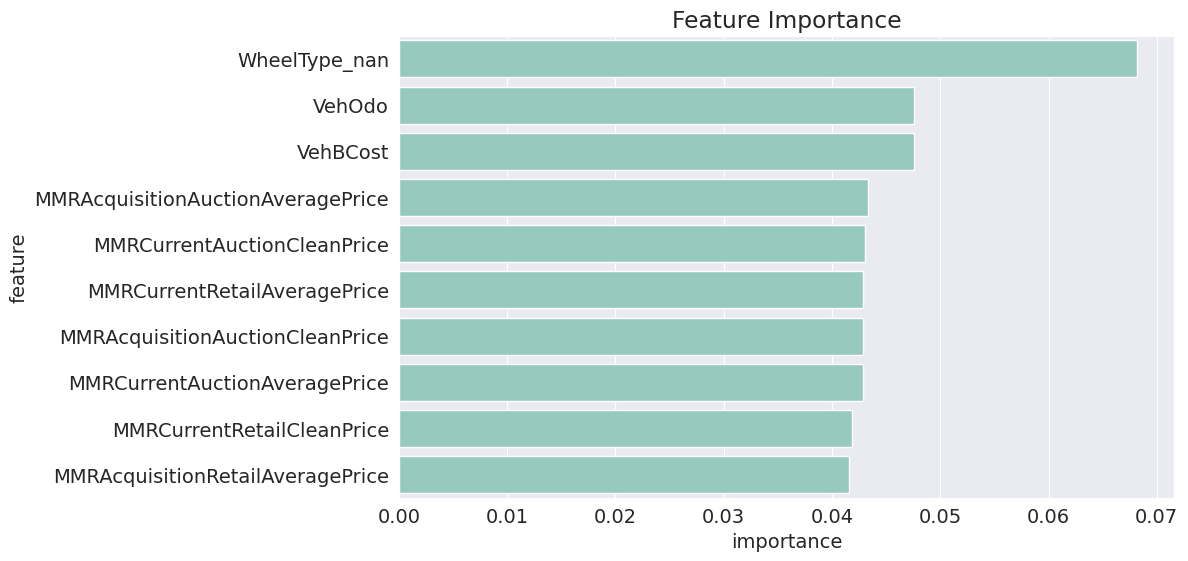

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning


In [59]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, targets)
    return model.score(X_train, targets), model.score(X_val, val_targets), model.score(X_val, val_targets)-raw_acc

In [60]:
test_params(max_depth=10)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.8769936240568537, 0.8778362380795791, -0.01994957798969632)

In [61]:
test_params(max_depth=50)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.975208725359446, 0.8983338813986628, 0.0005480653293873372)

In [62]:
test_params(max_depth=100)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9999634616438606, 0.8981694617998466, 0.00038364573057114715)

In [63]:
test_params(bootstrap=False)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(1.0, 0.8963608462128686, -0.0014249698564068325)

In [64]:
test_params(max_leaf_nodes=2**5)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.8768840089884357, 0.8777814315466403, -0.020004384522635088)

In [65]:
test_params(max_leaf_nodes=2**10)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.8967060671940369, 0.8874821878767949, -0.01030362819248054)

In [66]:
test_params(max_leaf_nodes=2**20)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1365: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



(0.9999634616438606, 0.8970185246081332, -0.0007672914611421833)

In [1]:
test_params(max_leaf_nodes=2**25)

NameError: name 'test_params' is not defined

In [1]:
test_params(max_features=5)

NameError: name 'test_params' is not defined

In [ ]:
test_params(max_features=6)

In [ ]:
test_params(max_features=7)

In [ ]:
test_params(max_features=8)

In [ ]:
test_params(n_estimators=250)

In [ ]:
test_params(n_estimators=500)

In [ ]:
test_params(class_weight={0: 1, 1: 2})

### Final Model

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth=50, n_estimators=250)
model.fit(X_train, targets)
model.score(X_train, targets), model.score(X_val, val_targets), model.score(X_val, val_targets)-raw_acc

In [ ]:
rfpreds = model.predict(X_test)

### Making Predictions on New Inputs

In [ ]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    print('Is it a bad buy? {}, Proba {}'.format(pred, round(prob*100,2)))

In [ ]:
new_input = {'Auction': 'MANHEIM',
             'VehYear': 2013,
             'VehicleAge': 2,
             'Make': 'KIA',
             'Model': 'SPECTRA',
             'Trim': 'Bas',
             'SubModel': '4D SEDAN',
             'Color': 'RED',
             'Transmission': 'AUTO',
             'WheelType': 'Covers',
             'VehOdo': 67452,
             'Nationality': 'AMERICAN',
             'Size': 'MEDIUM',
             'TopThreeAmericanName': 'CHRYSLER',
             'MMRAcquisitionAuctionAveragePrice': 7471.0,
             'MMRAcquisitionAuctionCleanPrice': 8455.0,
             'MMRAcquisitionRetailAveragePrice': 10916.0,
             'MMRAcquisitonRetailCleanPrice': 11881.0,
             'MMRCurrentAuctionAveragePrice': 7612.0,
             'MMRCurrentAuctionCleanPrice': 8615.0	,
             'MMRCurrentRetailAveragePrice': 10763.0,
             'MMRCurrentRetailCleanPrice': 11962.0,
             'PRIMEUNIT': '',
             'AUCGUART': '',
             'VNST': 'IN',
             'VehBCost': 8300.0,
             'IsOnlineSale': 0,
             'WarrantyCost': 521118.0}

In [ ]:
predict_input(model, new_input)

## Gradient Boosting



Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modell = XGBRegressor(random_state=42, n_jobs=-1)

In [ ]:
%%time
modell.fit(X_train, targets)

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

In [ ]:
plot_tree(modell, rankdir='LR');

In [ ]:
train_preds = modell.predict(X_train)
preds = [round(value) for value in train_preds]
accuracy_score(targets, preds)

In [ ]:
val_preds = modell.predict(X_val)
vpreds = [round(value) for value in val_preds]
raw_accx = accuracy_score(val_targets, vpreds)

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': modell.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Hyperparameter Tuning

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

In [ ]:
def test_params(**params):
    modell = XGBRegressor(n_jobs=-1, random_state=42, **params)
    modell.fit(X_train, targets)
    tpreds =  [round(value) for value in modell.predict(X_train)]
    train_acc = accuracy_score(tpreds, targets)
    vpreds =  [round(value) for value in modell.predict(X_val)]
    val_acc = accuracy_score(vpreds, val_targets)
    print('Train Acc: {}, Validation Acc: {}, Improvement: {}'.format(train_acc, val_acc, val_acc - raw_accx))

In [ ]:
test_params(n_estimators=5)

In [ ]:
test_params(n_estimators=4)

In [ ]:
test_params(n_estimators=3)

In [ ]:
test_params(n_estimators=2)

In [ ]:
test_params(n_estimators=4, max_depth=4)

In [ ]:
test_params(n_estimators=4, max_depth=5)

In [ ]:
test_params(n_estimators=4, max_depth=6)

In [ ]:
test_params(n_estimators=4, max_depth=7)

In [ ]:
test_params(n_estimators=4, max_depth=6, learning_rate=0.2)

In [ ]:
test_params(n_estimators=4, max_depth=6, learning_rate=0.3)

In [ ]:
test_params(n_estimators=4, max_depth=6, learning_rate=0.29)

In [ ]:
test_params(n_estimators=4, max_depth=6, learning_rate=0.28)

In [ ]:
test_params(n_estimators=4, max_depth=6, learning_rate=0.27)

### Final Model

In [ ]:
modell = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=4, max_depth=6, learning_rate=0.29)
modell.fit(X_train, targets)
tpreds =  [round(value) for value in modell.predict(X_train)]
train_acc = accuracy_score(tpreds, targets)
vpreds =  [round(value) for value in modell.predict(X_val)]
val_acc = accuracy_score(vpreds, val_targets)
print('Train Acc: {}, Validation Acc: {}'.format(train_acc, val_acc))

In [ ]:
xgbpreds = modell.fit(X_train, targets)

### Making Predictions on New Inputs

In [ ]:
def predict_input1(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    print('Is it a bad buy? {}, Proba {}'.format(round(pred), 100-round(pred*100,2)))

In [ ]:
predict_input1(modell, new_input)

## Saving Trained Models



We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk.

In [ ]:
import joblib

In [ ]:
rf_quality_detection = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(rf_quality_detection, 'rf_quality_detection.joblib')

In [ ]:
xgb_quality_detection = {
    'model': modell,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [ ]:
joblib.dump(xgb_quality_detection, 'xgb_quality_detection.joblib')

## Inferences and Conclusion

In conclusion, based on our train dataset, we can predict whether our purchase is good or bad with around 90 percent accuracy. In addition, Gradient Boosting was slightly more accurate.

## References and Future Work

> - You can find the dataset on this page: https://www.kaggle.com/c/DontGetKicked/
> - [Jovian](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms) learning content has helped me a lot.
> - logistic regression might be a better model to learn
> - hyperparameter tuning should be done more thoroughly